In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('flight_price.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df['date']=df['Date_of_Journey'].str.split('/').str[0].astype(int)


In [5]:
df['month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)

In [6]:
df['year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
date                int64
month               int64
year                int64
dtype: object

In [11]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [12]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,day,time_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,3,2019,Sun,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-01-05,5,2019,Sat,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-09-06,6,2019,Fri,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-12-05,5,2019,Thu,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-01-03,3,2019,Thu,285.0


In [13]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [14]:
df['Arrival_Time'].str.split(':').str[0]

0        01
1        13
2        04
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Time, Length: 10683, dtype: object

In [15]:
df['Arrival__hour']=df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arrival__minute']=df['Arrival_Time'].str.split(':').str[1].astype(int)


In [16]:
df['dep__hour']=df['Dep_Time'].str.split(':').str[0].astype(int)
df['dep__minute']=df['Dep_Time'].str.split(':').str[1].astype(int)


In [17]:
df['Arrival__hour']=df['Arrival__hour'].astype(int)
df['Arrival__minute']=df['Arrival__minute'].astype(int)

In [18]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,day,time_in_minutes,Arrival__hour,Arrival__minute,dep__hour,dep__minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,2019-03-24,3,2019,Sun,170.0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-01-05,5,2019,Sat,445.0,13,15,5,50


In [19]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [20]:
df.drop('Dep_Time',axis=1,inplace=True)

In [21]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,day,time_in_minutes,Arrival__hour,Arrival__minute,dep__hour,dep__minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019-03-24,3,2019,Sun,170.0,1,10,22,20


In [9]:
df['date']=pd.to_datetime(df['Date_of_Journey'])
df['day']=df['date'].dt.strftime('%a')

/tmp/ipykernel_95/1525019212.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date']=pd.to_datetime(df['Date_of_Journey'])


In [10]:
df['time_in_minutes'] = pd.to_timedelta(df['Duration'], errors='coerce').dt.total_seconds() / 60

In [22]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,day,time_in_minutes,Arrival__hour,Arrival__minute,dep__hour,dep__minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019-03-24,3,2019,Sun,170.0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019-01-05,5,2019,Sat,445.0,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019-09-06,6,2019,Fri,1140.0,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019-12-05,5,2019,Thu,325.0,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019-01-03,3,2019,Thu,285.0,21,35,16,50


In [23]:
df.drop('Duration',axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Source           10683 non-null  object        
 2   Destination      10683 non-null  object        
 3   Route            10682 non-null  object        
 4   Total_Stops      10682 non-null  object        
 5   Additional_Info  10683 non-null  object        
 6   Price            10683 non-null  int64         
 7   date             10683 non-null  datetime64[ns]
 8   month            10683 non-null  int64         
 9   year             10683 non-null  int64         
 10  day              10683 non-null  object        
 11  time_in_minutes  10683 non-null  float64       
 12  Arrival__hour    10683 non-null  int64         
 13  Arrival__minute  10683 non-null  int64         
 14  dep__hour        10683 non-null  int64

In [25]:
df.describe()

,Price,month,year,time_in_minutes,Arrival__hour,Arrival__minute,dep__hour,dep__minute
count,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,4.708602,2019.0,643.093232,13.348778,24.690630,12.490686,24.411214
std,4611.359167,1.164357,0.0,507.862001,6.859125,16.506036,5.748650,18.767980
min,1759.000000,3.000000,2019.0,5.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,3.000000,2019.0,170.000000,8.000000,10.000000,8.000000,5.000000
50%,8372.000000,5.000000,2019.0,520.000000,14.000000,25.000000,11.000000,25.000000
75%,12373.000000,6.000000,2019.0,930.000000,19.000000,35.000000,18.000000,40.000000
max,79512.000000,6.000000,2019.0,2860.000000,23.000000,55.000000,23.000000,55.000000


In [26]:
df.shape

(10683, 16)

In [28]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [34]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,day,time_in_minutes,Arrival__hour,Arrival__minute,dep__hour,dep__minute
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,2019-06-05,5,2019,Wed,1420.0,9,25,9,45


In [35]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

In [36]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [38]:
df.drop('Route',axis=1,inplace=True)

In [39]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,day,time_in_minutes,Arrival__hour,Arrival__minute,dep__hour,dep__minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,2019-03-24,3,2019,Sun,170.0,1,10,22,20
1,Air India,Kolkata,Banglore,2,No info,7662,2019-01-05,5,2019,Sat,445.0,13,15,5,50
2,Jet Airways,Delhi,Cochin,2,No info,13882,2019-09-06,6,2019,Fri,1140.0,4,25,9,25
3,IndiGo,Kolkata,Banglore,1,No info,6218,2019-12-05,5,2019,Thu,325.0,23,30,18,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,2019-01-03,3,2019,Thu,285.0,21,35,16,50


In [27]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
date               0
month              0
year               0
day                0
time_in_minutes    0
Arrival__hour      0
Arrival__minute    0
dep__hour          0
dep__minute        0
dtype: int64

In [20]:
df.duplicated().sum()

220

In [21]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [22]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

<AxesSubplot: xlabel='Destination', ylabel='Count'>

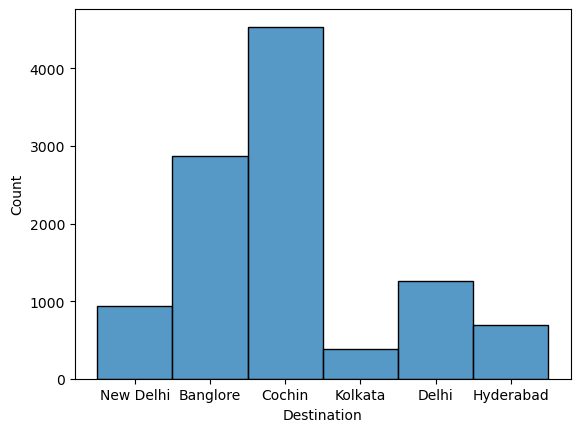

In [24]:
sns.histplot(df['Destination'])

<AxesSubplot: xlabel='day', ylabel='Count'>

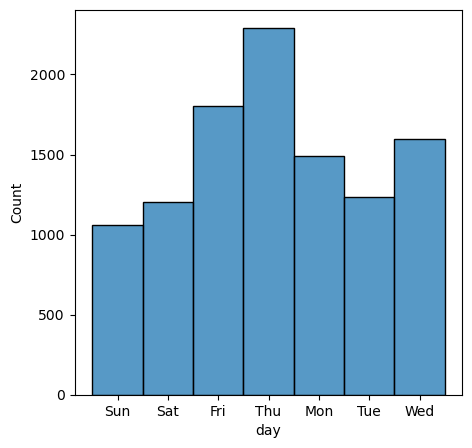

In [68]:
plt.figure(figsize=(5,5))
sns.histplot(df['day'])

<AxesSubplot: xlabel='Airline', ylabel='Count'>

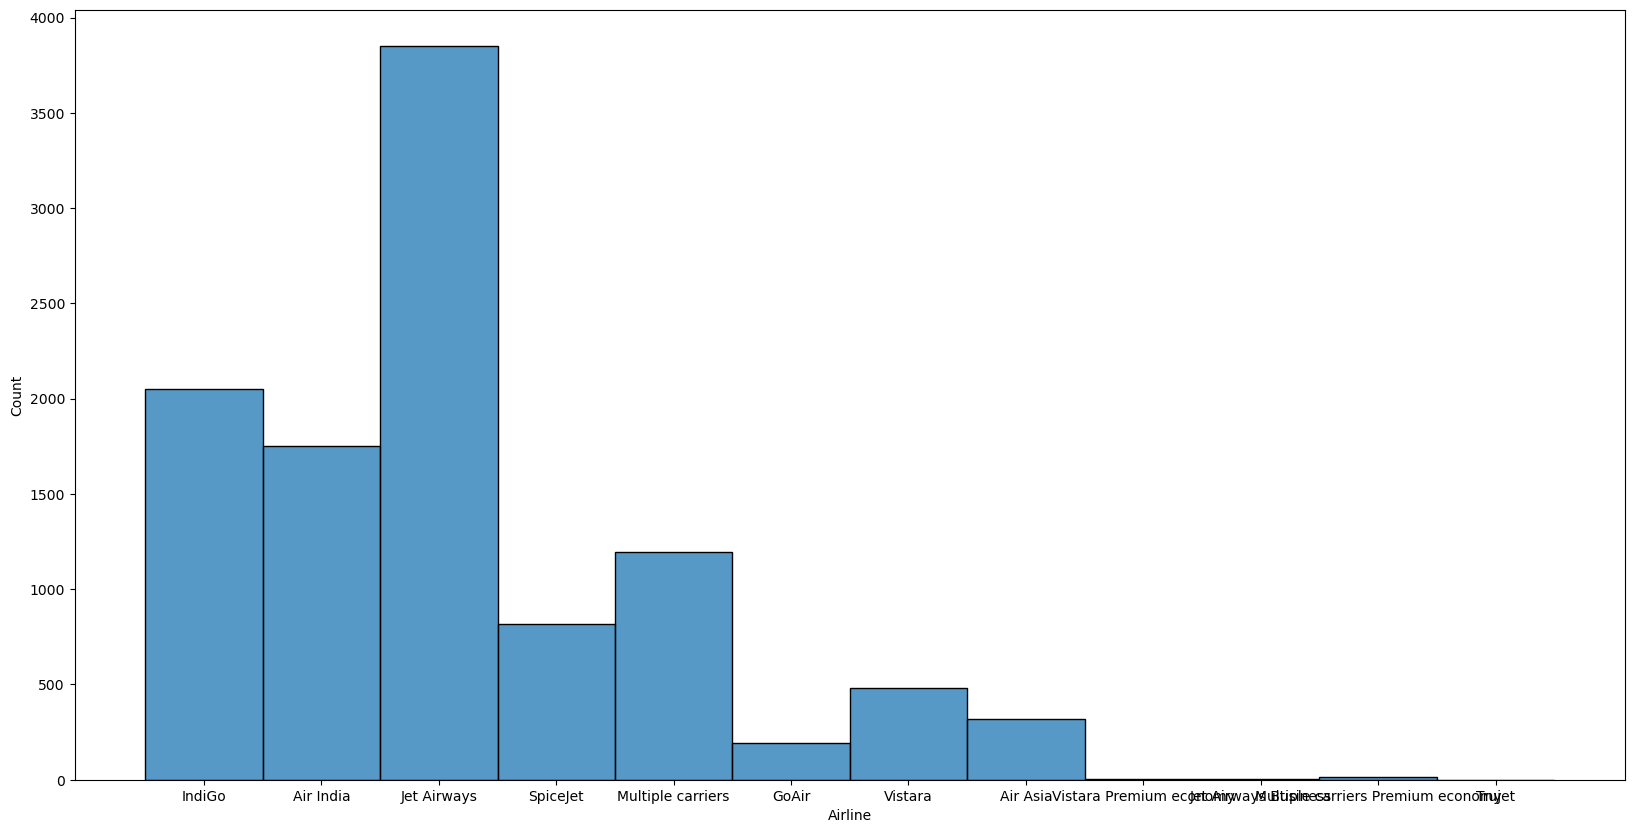

In [32]:
plt.figure(figsize=(20,10))
sns.histplot(df['Airline'])

# insights
1. max tickets are  booked  from Delhi 
2. max tickets are booked  to cochin 
3. max tickets are booked on Jet Airways
4. max flight taken on thusday

<AxesSubplot: xlabel='Price', ylabel='Count'>

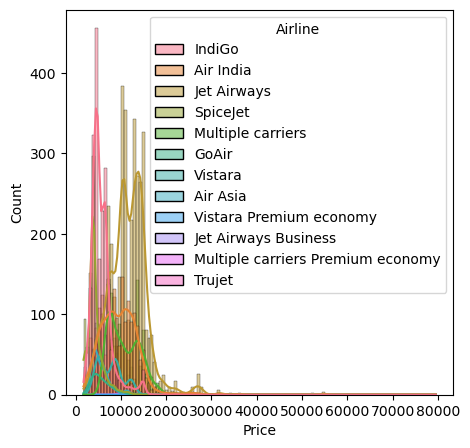

In [25]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,x='Price',hue='Airline',kde=True)

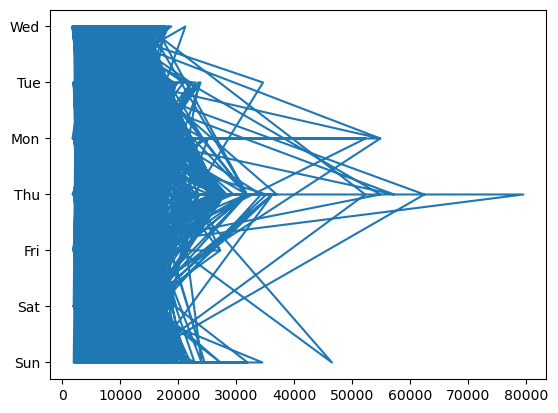

In [16]:
plt.plot(df['Price'],df['day'])

<AxesSubplot: xlabel='day', ylabel='Price'>

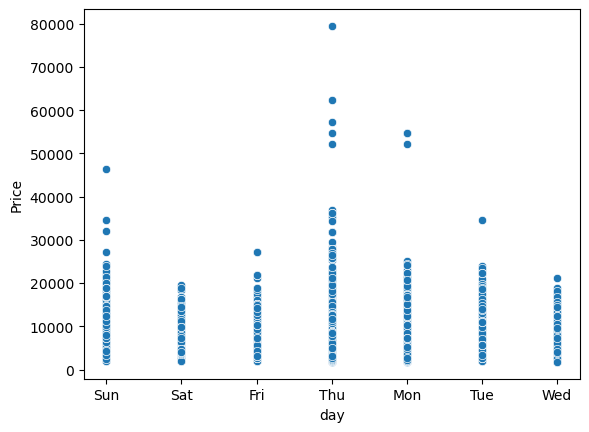

In [79]:
sns.scatterplot(x=df['day'],y=df['Price'])

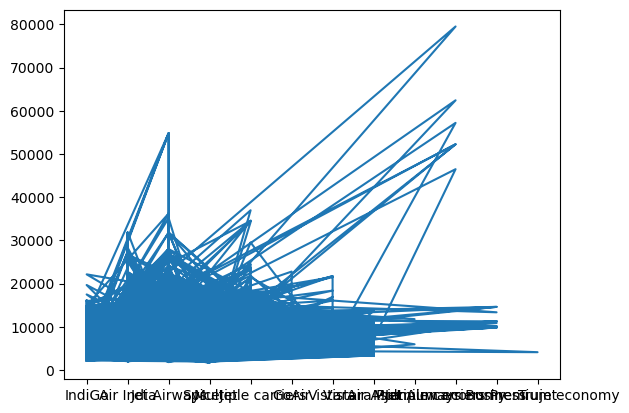

In [71]:
plt.plot(df['Airline'],df['Price'])

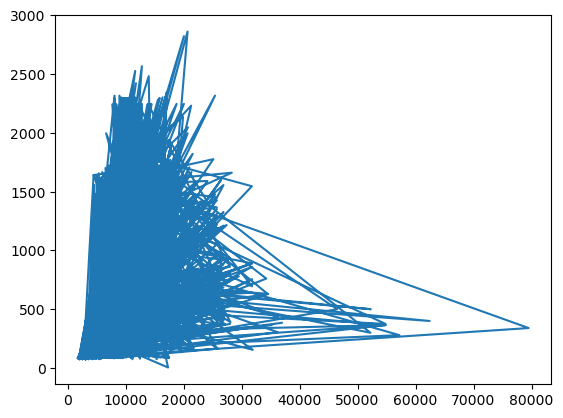

In [17]:
plt.plot(df['Price'],df['time_in_minutes'])